# King County Housing Data: Nicoloe Johnson (Buyer)
Student: Claude Mindt-Kries

## General Process
1. **Understanding** (data, columns, types, domain)
2. **Hypothesis**: Key assumptions, questions to self
3. **Explore** (groups, skewness, centrality/spread), re-express if needed
4. **Clean** (missing calues, extremes, outliers)
5. **Relationships** (correlations)
6. **Hypothesis-Re-iteration** (assumption correct? right questions?)
7. **Fine tune** (keep only relevant plots, make clear and self explanatory)
8. **Explain** (document thought process, why what has been done)

<img src="./files/EDA_Checklist.png" alt="Checklist" style="width:100px;"/>

## Customer / Needs
Nicole Johnson wants to buy a house following the following criteria:
* lively neighborhood
* central location
* middle price range
* right timing: within a year (lowest price)
* Assumption: Nicole wants to establish a family (2 adults, 1-2 children) -> 2-3 bedrooms needed, >= 1000sqft (~100qm)

## Expected Output
1. This jupyter notebook (well documented, essence only), published to GitHub.
2. Presentation/slides 10 min + 5 min discussion
3. Updated README.
4. Optional: Python script cleaning data

## Expected Outcome I: Data Insights

<span style="color:red">Assumptions: *see through notebook and put them here*</span>

**At least 3 insights on overall data - 1 should be geographical.**

1. Geo: Location of houses on map show very is lively i.e. close neighborhood
2. Geo: Recommendation about central location
3. Middle Price Range: needs to be defined
4. Size: 2-3 Bedrooms


## Expected Outcome II: Client Recommendation
**Give advice to buyer which house to buy and why.**
1. ...
2. ...
3. ...


## Investigation
### Loading data, checking data types and domain

In [115]:
# importing standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [116]:
# Loading data
df_ori = pd.read_csv("./data/King_County_House_prices_dataset.csv")     # keeping a safe copy of original data
df = df_ori.copy()

In [117]:
from IPython.display import display                 # Allow for multiple outputs in one cell
pd.set_option('display.max_columns', None)          # Display all columns, otherwise one col 'condition' had been hidden
pd.options.display.float_format = "{:,.2f}".format  # rounding to 2 decimal numbers for display; data itself is not altered

# General understanding of data
display(df.head(10))
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}\n")
display(df.info())

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,"221,900.00",3,1.00,1180,5650,1.00,NaN,0.00,3,7,1180,0.0,1955,0.00,98178,47.51,-122.26,1340,5650
1,6414100192,12/9/2014,"538,000.00",3,2.25,2570,7242,2.00,0.00,0.00,3,7,2170,400.0,1951,"1,991.00",98125,47.72,-122.32,1690,7639
2,5631500400,2/25/2015,"180,000.00",2,1.00,770,10000,1.00,0.00,0.00,3,6,770,0.0,1933,NaN,98028,47.74,-122.23,2720,8062
3,2487200875,12/9/2014,"604,000.00",4,3.00,1960,5000,1.00,0.00,0.00,5,7,1050,910.0,1965,0.00,98136,47.52,-122.39,1360,5000
4,1954400510,2/18/2015,"510,000.00",3,2.00,1680,8080,1.00,0.00,0.00,3,8,1680,0.0,1987,0.00,98074,47.62,-122.05,1800,7503
5,7237550310,5/12/2014,"1,230,000.00",4,4.50,5420,101930,1.00,0.00,0.00,3,11,3890,1530.0,2001,0.00,98053,47.66,-122.00,4760,101930
6,1321400060,6/27/2014,"257,500.00",3,2.25,1715,6819,2.00,0.00,0.00,3,7,1715,?,1995,0.00,98003,47.31,-122.33,2238,6819
7,2008000270,1/15/2015,"291,850.00",3,1.50,1060,9711,1.00,0.00,NaN,3,7,1060,0.0,1963,0.00,98198,47.41,-122.31,1650,9711
8,2414600126,4/15/2015,"229,500.00",3,1.00,1780,7470,1.00,0.00,0.00,3,7,1050,730.0,1960,0.00,98146,47.51,-122.34,1780,8113
9,3793500160,3/12/2015,"323,000.00",3,2.50,1890,6560,2.00,0.00,0.00,3,7,1890,0.0,2003,0.00,98038,47.37,-122.03,2390,7570


Rows: 21597, Columns: 21

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non

None

#### Observations on Data Types
1. Date is of type 'object' and should be **converted to date** ✅
2. ~~Some numbers should be **rounded** to 2 decimals (not longitude/latitude though)~~ ✅
3. Floors & price might be possible to **translate to int** (needs checking) (performance improvements) ✅
4. yr_renovated is float, **should be date or int** ✅
5. **empty values** at least in yr_renovated, waterfront, view (and possibly others) ✅
6. 'waterfront' should be **type bool** ✅
7. Check for **duplicates**! ✅
8. **Unclear** How can houses have been sold with 0 views?
9. **Unclear** what 'grade' tells in general (is low good or bad?) -> ask if data is critical

#### Initial Hypotheses & Questions to self
1. A **lively neighborhood** (wanted) could be defined by mapping houses to a map (density).
2. I assume houses at the waterfront would be less lively i.e. less cental (central location wanted)
3. The price range and **middle price range (wanted)** can be defined
4. A **good point in time** can be estimated by looking at house prices and when in the year they had been comparably low
5. No info is available about Nicole, I assume she is looking for a house **suitable to start a small family (2 adults, 1-2 children) i.e. 2-3 bedrooms**

### Renaming for better readability

In [118]:
columns_mapping = {
    'id': 'ID',
    'date': 'Date_Sold',
    'price': 'Price',
    'bedrooms': 'Rooms_Bed',
    'bathrooms': 'Rooms_Bath',
    'floors': 'Floors',
    'sqft_living': 'Sqft_Living',
    'sqft_lot': 'Sqft_Lot',
    'waterfront': 'Waterfront',
    'condition': 'Condition',
    'sqft_above': 'Sqft_above',
    'sqft_basement': 'Sqft_basement',
    'yr_built': 'Yr_Built',
    'yr_renovated': 'Yr_Renovated',
    'zipcode': 'ZIP',
    'lat': 'Lat',
    'long': 'Long',
    'sqft_living15': 'Sqft_living15',
    'sqft_lot15': 'Sqft_lot15',
    'renovated': 'Renovated',
    'view': 'Viewed',
    'grade': 'Grade',
}

df.rename(columns=columns_mapping, inplace=True)
df.sort_index(axis=1, inplace=True) # Sort columns alphabetically
df.head()

,Condition,Date_Sold,Floors,Grade,ID,Lat,Long,Price,Rooms_Bath,Rooms_Bed,Sqft_Living,Sqft_Lot,Sqft_above,Sqft_basement,Sqft_living15,Sqft_lot15,Viewed,Waterfront,Yr_Built,Yr_Renovated,ZIP
0,3,10/13/2014,1.00,7,7129300520,47.51,-122.26,"221,900.00",1.00,3,1180,5650,1180,0.0,1340,5650,0.00,NaN,1955,0.00,98178
1,3,12/9/2014,2.00,7,6414100192,47.72,-122.32,"538,000.00",2.25,3,2570,7242,2170,400.0,1690,7639,0.00,0.00,1951,"1,991.00",98125
2,3,2/25/2015,1.00,6,5631500400,47.74,-122.23,"180,000.00",1.00,2,770,10000,770,0.0,2720,8062,0.00,0.00,1933,NaN,98028
3,5,12/9/2014,1.00,7,2487200875,47.52,-122.39,"604,000.00",3.00,4,1960,5000,1050,910.0,1360,5000,0.00,0.00,1965,0.00,98136
4,3,2/18/2015,1.00,8,1954400510,47.62,-122.05,"510,000.00",2.00,3,1680,8080,1680,0.0,1800,7503,0.00,0.00,1987,0.00,98074


### Data Cleaning


In [119]:
# Converting date / timestamps

# Checking for null values
date_cols = [ 'Date_Sold', 'Yr_Built', 'Yr_Renovated' ]
def check_null(cols):
    for col in cols:
        nan = df[col].isnull().sum()
        print(f"There are {nan} null values in column {col}")

check_null(date_cols)

There are 0 null values in column Date_Sold
There are 0 null values in column Yr_Built
There are 3842 null values in column Yr_Renovated


#### Date conversions

<span style="color:red">**Assumption**: I assume that a "null" value in yr_renovated means, the object had not been renovated until end of data collection</span>

In [120]:

# Convert do dates
df['Date_Sold'] = pd.to_datetime(df['Date_Sold'], format='%m/%d/%Y')
# Adding Month_sold to research if certain month of year affect price
df['Month_Sold'] = df.Date_Sold.dt.month
df['Yr_Built'] = pd.to_datetime(df['Yr_Built'], format='%Y').dt.year

# yr_renovated contains 0, NaN and floats. Everything else than a float > 0 should be treated as NaN
df['Yr_Renovated'] = pd.to_datetime(df['Yr_Renovated'], format='%Y', errors='coerce').dt.year           # Grab the year
df['Yr_Renovated'] = df['Yr_Renovated'].fillna(-1)                                                      # Replace NaN values with a placeholder value 0
df['Yr_Renovated'] = df['Yr_Renovated'].astype(int)                                                     # convert year to integer (otherwise it is shown as float, weirdly)

df['Renovated'] = df['Yr_Renovated'].apply(lambda x: 1 if x > 0 else 0)                                 # Add a column: 1 for renovated, 0 for not renovated
df.sort_index(axis=1, inplace=True)                                                                     # Sort columns alphabetically
df['Renovated'].value_counts()


Renovated
0    20853
1      744
Name: count, dtype: int64

#### Other conversions

<span style="color:red">**Assumption**: NA in column view means not viewed</span>

In [121]:
df['Rooms_Bath'] = df['Rooms_Bath'].astype(int)         # no fractions of bathrooms -> int
df['Waterfront'] = df['Waterfront'].astype(bool)        # Waterfront can be yes or no -> bool

# Convert type object to numeric/float, filling non-numeric with Nan (errors='coerce')
df['Sqft_basement'] = pd.to_numeric(df['Sqft_basement'], errors='coerce')
df['Sqft_basement'] = df['Sqft_basement'].astype(float)

print(f"There are {df['Viewed'].isna().sum()} null values in Viewed. I assume we can set those to 0.")
df['Viewed'] = df['Viewed'].fillna(0)                   # Set na to 0, assuming na means not viewed
df['Viewed'] = df['Viewed'].astype(int)
df['Viewed'].value_counts()



There are 63 null values in Viewed. I assume we can set those to 0.


Viewed
0    19485
2      957
3      508
1      330
4      317
Name: count, dtype: int64

#### Checking for duplicates

In [122]:
dups = df.duplicated().sum()
if dups > 0:
    print(f"Number of duplicates found: {dups}")
else:
    print("No duplicates found (count is 0)")

No duplicates found (count is 0)


#### Remove unnecessary

In [123]:
# As it is not about those specific houses, we can drop the ID
df.drop(['ID'], axis=1, inplace=True)
df.head(20)

,Condition,Date_Sold,Floors,Grade,Lat,Long,Month_Sold,Price,Renovated,Rooms_Bath,Rooms_Bed,Sqft_Living,Sqft_Lot,Sqft_above,Sqft_basement,Sqft_living15,Sqft_lot15,Viewed,Waterfront,Yr_Built,Yr_Renovated,ZIP
0,3,2014-10-13,1.00,7,47.51,-122.26,10,"221,900.00",0,1,3,1180,5650,1180,0.00,1340,5650,0,True,1955,-1,98178
1,3,2014-12-09,2.00,7,47.72,-122.32,12,"538,000.00",1,2,3,2570,7242,2170,400.00,1690,7639,0,False,1951,1991,98125
2,3,2015-02-25,1.00,6,47.74,-122.23,2,"180,000.00",0,1,2,770,10000,770,0.00,2720,8062,0,False,1933,-1,98028
3,5,2014-12-09,1.00,7,47.52,-122.39,12,"604,000.00",0,3,4,1960,5000,1050,910.00,1360,5000,0,False,1965,-1,98136
4,3,2015-02-18,1.00,8,47.62,-122.05,2,"510,000.00",0,2,3,1680,8080,1680,0.00,1800,7503,0,False,1987,-1,98074
5,3,2014-05-12,1.00,11,47.66,-122.00,5,"1,230,000.00",0,4,4,5420,101930,3890,"1,530.00",4760,101930,0,False,2001,-1,98053
6,3,2014-06-27,2.00,7,47.31,-122.33,6,"257,500.00",0,2,3,1715,6819,1715,NaN,2238,6819,0,False,1995,-1,98003
7,3,2015-01-15,1.00,7,47.41,-122.31,1,"291,850.00",0,1,3,1060,9711,1060,0.00,1650,9711,0,False,1963,-1,98198
8,3,2015-04-15,1.00,7,47.51,-122.34,4,"229,500.00",0,1,3,1780,7470,1050,730.00,1780,8113,0,False,1960,-1,98146
9,3,2015-03-12,2.00,7,47.37,-122.03,3,"323,000.00",0,2,3,1890,6560,1890,0.00,2390,7570,0,False,2003,-1,98038


#### Subset of data that fits 2-3 bedrooms for small family, >= 1000 sqft

* lively neighborhood
* central location
* middle price range
* right timing: within a year (lowest price)
* Assumption: Nicole wants to establish a family (2 adults, 1-2 children) -> 2-3 bedrooms needed


In [124]:
# Subset of data
df_fam = df[ (df.Rooms_Bed >= 2) & (df.Rooms_Bed <= 3) & (df.Sqft_Living >= 1000)].copy()

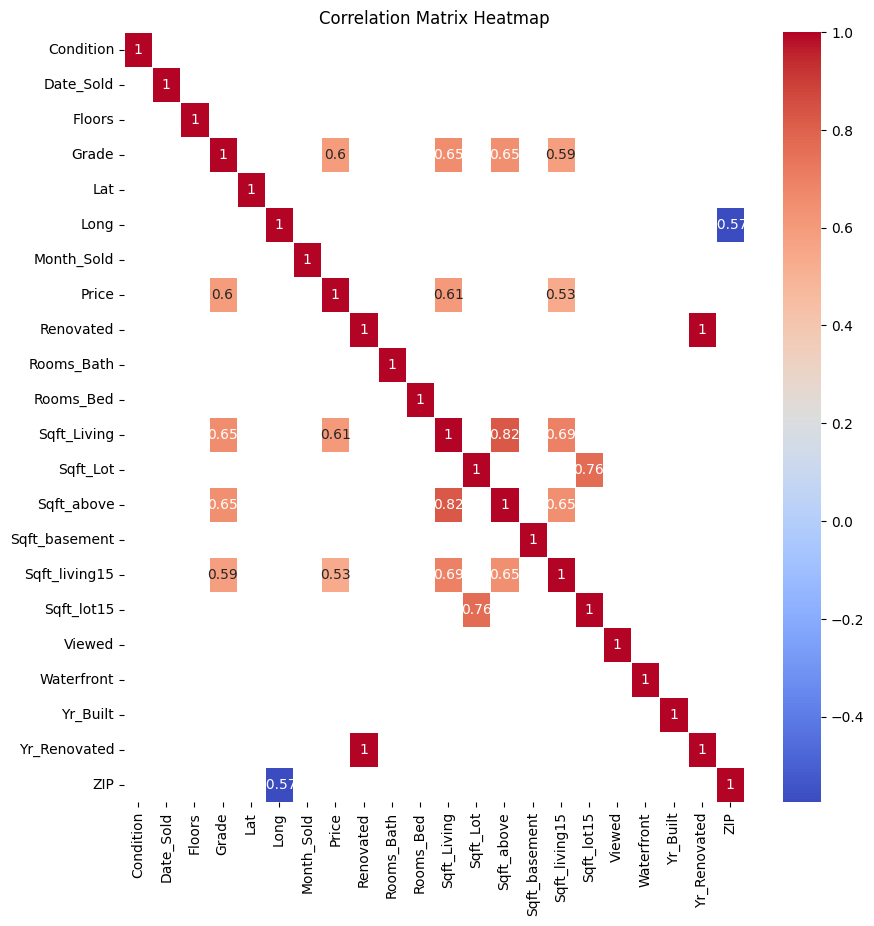

In [125]:
# Correlation matrix
corr_mat = df_fam.corr()
# Show correlations greater than threshold
thresh = 0.5
corr_filt = corr_mat[abs(corr_mat) >= thresh]

plt.figure(figsize=(10, 10))
sns.heatmap(corr_filt, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

**Highest Correlations**
* Grade - Sqft_living, Sqft_above, Price
* Price - Sqft_living, Grade, Sqft_living15
* Rooms_Bed seems not to correlate to anything
* Sqft_living - Sqft_above, Sqft_living15
* Sqft_lit - Sqft_lot_15

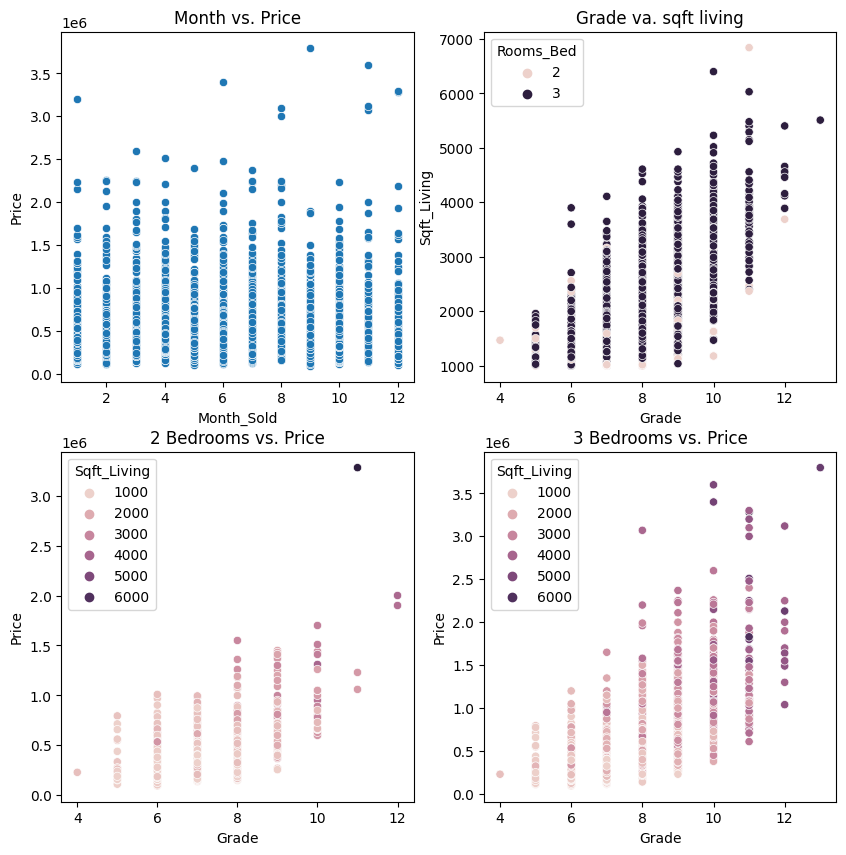

In [126]:
fig, ax = plt.subplots(2, 2, figsize=(10,10))

ax[0, 0].set_title('Month vs. Price')
sns.scatterplot(data=df_fam, x='Month_Sold', y='Price',  ax=ax[0, 0])

ax[0, 1].set_title('Grade va. sqft living')
sns.scatterplot(data=df_fam, x='Grade', y='Sqft_Living', hue='Rooms_Bed', ax=ax[0, 1])

# plotting for houses with 2 bedrooms
bed_2 = df_fam[df_fam.Rooms_Bed <= 2]
ax[1, 0].set_title('2 Bedrooms vs. Price')
sns.scatterplot(data=bed_2, x='Grade', y='Price', hue='Sqft_Living', ax=ax[1, 0])

# plotting for houses with 3 bedrooms
bed_3 = df_fam[df_fam.Rooms_Bed <= 3]
ax[1, 1].set_title('3 Bedrooms vs. Price')
sns.scatterplot(data=bed_3, x='Grade', y='Price', hue='Sqft_Living', ax=ax[1, 1])

plt.show()

<Axes: title={'center': 'Zoom: 2 vs. 3 Bedroom Houses and Prices'}, xlabel='Rooms_Bed', ylabel='Price'>

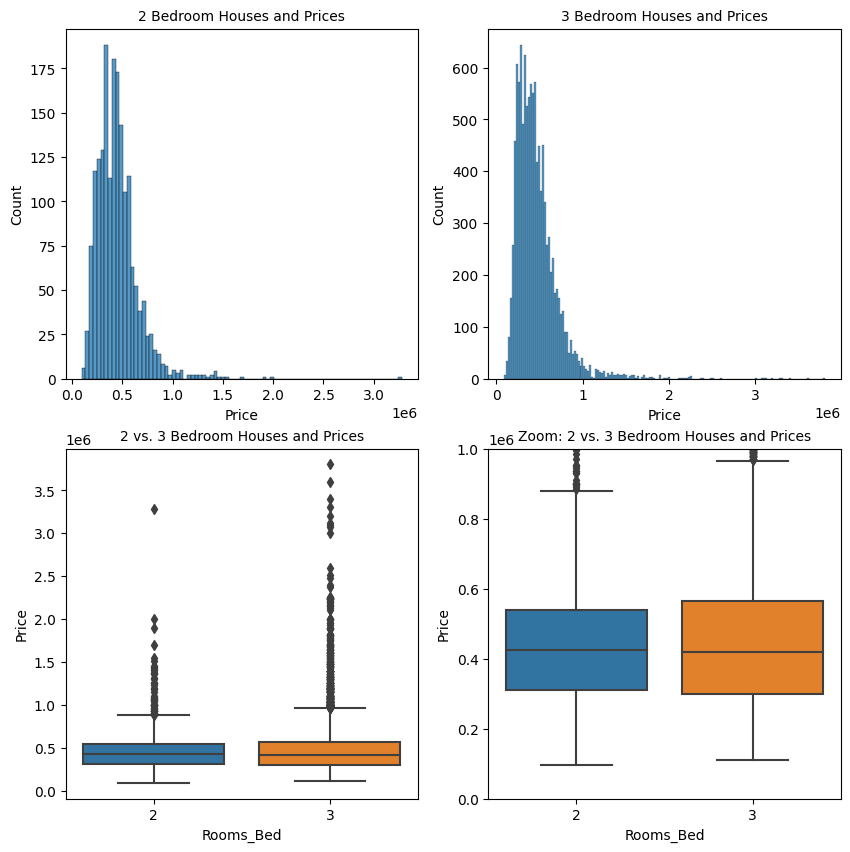

In [129]:
# Define a function to set font sizes for plot elements
def set_font_sizes(ax, title_size=10, label_size=10, tick_label_size=10):
    ax.set_title(ax.get_title(), fontsize=title_size)
    ax.set_xlabel(ax.get_xlabel(), fontsize=label_size)
    ax.set_ylabel(ax.get_ylabel(), fontsize=label_size)
    ax.tick_params(axis='both', labelsize=tick_label_size)

fig, ax = plt.subplots(2, 2, figsize=(10,10))

prices = df_fam['Price']

ax[0, 0].set_title('2 Bedroom Houses and Prices')
sns.histplot(data=bed_2['Price'], ax=ax[0, 0])
set_font_sizes(ax[0, 0])

ax[0, 1].set_title('3 Bedroom Houses and Prices')
sns.histplot(data=bed_3['Price'], ax=ax[0, 1])
set_font_sizes(ax[0, 1])


ax[1, 0].set_title('2 vs. 3 Bedroom Houses and Prices')
sns.boxplot(data=df_fam, x='Rooms_Bed', y='Price', ax=ax[1, 0])
set_font_sizes(ax[1, 0])

ax[1, 1].set_title('Zoom: 2 vs. 3 Bedroom Houses and Prices')
ax[1, 1].set_ylim(0, 1000000)
set_font_sizes(ax[1, 1])
sns.boxplot(data=df_fam, x='Rooms_Bed', y='Price', ax=ax[1, 1])


In [110]:
display(bed_2.describe())
display(bed_3.describe())

,Condition,Date_Sold,Floors,Grade,ID,Lat,Long,Month_Sold,Price,Renovated,Rooms_Bath,Rooms_Bed,Sqft_Living,Sqft_Lot,Sqft_above,Sqft_basement,Sqft_living15,Sqft_lot15,Viewed,Yr_Built,Yr_Renovated,ZIP
count,"1,824.00",1824,"1,824.00","1,824.00","1,824.00","1,824.00","1,824.00","1,824.00","1,824.00","1,824.00","1,824.00","1,824.00","1,824.00","1,824.00","1,824.00","1,783.00","1,824.00","1,824.00","1,824.00","1,824.00","1,824.00","1,824.00"
mean,3.37,2014-11-02 20:11:03.157894656,1.41,7.18,"4,692,750,569.45",47.59,-122.27,6.62,"449,602.15",0.04,1.31,2.00,"1,448.37","13,264.34","1,252.18",195.48,"1,601.11","10,546.93",0.23,"1,961.41",79.70,"98,100.71"
min,1.00,2014-05-02 00:00:00,1.00,4.00,"7,600,136.00",47.19,-122.51,1.00,"95,000.00",0.00,0.00,2.00,"1,000.00",600.00,560.00,0.00,460.00,659.00,0.00,"1,900.00",-1.00,"98,001.00"
25%,3.00,2014-07-23 00:00:00,1.00,7.00,"2,159,650,038.75",47.53,-122.36,4.00,"310,000.00",0.00,1.00,2.00,"1,150.00","2,854.50","1,020.00",0.00,"1,310.00","3,500.00",0.00,"1,936.00",-1.00,"98,055.00"
50%,3.00,2014-10-24 00:00:00,1.00,7.00,"3,868,650,165.00",47.62,-122.31,6.00,"425,000.00",0.00,1.00,2.00,"1,320.00","5,076.00","1,160.00",0.00,"1,510.00","5,100.00",0.00,"1,952.00",-1.00,"98,112.00"
75%,4.00,2015-02-19 06:00:00,2.00,8.00,"7,567,875,067.50",47.69,-122.22,9.00,"539,962.50",0.00,2.00,2.00,"1,610.00","8,137.25","1,393.00",320.00,"1,800.00","7,722.50",0.00,"2,001.00",-1.00,"98,126.00"
max,5.00,2015-05-24 00:00:00,3.50,12.00,"9,895,000,040.00",47.78,-121.32,12.00,"3,280,000.00",1.00,3.00,2.00,"6,840.00","982,278.00","4,350.00","2,490.00","4,270.00","411,962.00",4.00,"2,015.00","2,014.00","98,199.00"
std,0.63,NaN,0.59,0.89,"2,940,385,833.93",0.12,0.14,3.15,"213,257.81",0.20,0.50,0.00,438.53,"49,389.62",384.61,301.13,432.21,"28,619.70",0.78,34.26,392.55,48.79


,Condition,Date_Sold,Floors,Grade,ID,Lat,Long,Month_Sold,Price,Renovated,Rooms_Bath,Rooms_Bed,Sqft_Living,Sqft_Lot,Sqft_above,Sqft_basement,Sqft_living15,Sqft_lot15,Viewed,Yr_Built,Yr_Renovated,ZIP
count,"11,311.00",11311,"11,311.00","11,311.00","11,311.00","11,311.00","11,311.00","11,311.00","11,311.00","11,311.00","11,311.00","11,311.00","11,311.00","11,311.00","11,311.00","11,094.00","11,311.00","11,311.00","11,311.00","11,311.00","11,311.00","11,311.00"
mean,3.41,2014-10-30 04:46:42.086464256,1.46,7.46,"4,554,285,070.61",47.56,-122.22,6.56,"469,249.68",0.03,1.57,2.84,"1,774.60","14,404.73","1,551.00",223.37,"1,814.08","12,587.86",0.20,"1,970.69",64.63,"98,080.18"
min,1.00,2014-05-02 00:00:00,1.00,4.00,"1,200,021.00",47.16,-122.52,1.00,"95,000.00",0.00,0.00,2.00,"1,000.00",572.00,560.00,0.00,399.00,651.00,0.00,"1,900.00",-1.00,"98,001.00"
25%,3.00,2014-07-23 00:00:00,1.00,7.00,"2,111,010,915.00",47.46,-122.34,4.00,"302,388.50",0.00,1.00,3.00,"1,340.00","4,574.00","1,160.00",0.00,"1,440.00","4,750.00",0.00,"1,952.00",-1.00,"98,033.00"
50%,3.00,2014-10-17 00:00:00,1.00,7.00,"3,845,100,140.00",47.57,-122.27,6.00,"420,000.00",0.00,2.00,3.00,"1,640.00","7,370.00","1,410.00",0.00,"1,690.00","7,473.00",0.00,"1,975.00",-1.00,"98,072.00"
75%,4.00,2015-02-18 00:00:00,2.00,8.00,"7,310,550,305.00",47.68,-122.13,9.00,"560,000.00",0.00,2.00,3.00,"2,062.00","10,170.00","1,790.00",420.00,"2,090.00","9,800.00",0.00,"1,994.00",-1.00,"98,118.00"
max,5.00,2015-05-24 00:00:00,3.50,13.00,"9,900,000,190.00",47.78,-121.32,12.00,"3,800,000.00",1.00,4.00,3.00,"6,840.00","982,278.00","5,480.00","2,490.00","4,950.00","560,617.00",4.00,"2,015.00","2,015.00","98,199.00"
std,0.64,NaN,0.57,0.94,"2,886,475,577.28",0.14,0.15,3.12,"256,519.54",0.18,0.60,0.37,603.59,"38,626.29",559.00,346.59,530.29,"27,859.83",0.71,28.77,355.93,53.54


<span style="color:red">Conclusion: It looks as if it does not makes big difference in general in price, if you choose 2 or 3 bedroom house (Median differs only by 5k). So the clients chooses to go with the 3 bed room house, to be more flexible. We now have to check, if there is an issue between location and 2 or 3 bedrooms...</span>

### Tools

In [15]:
# Are all entries int or float?
#def is_number(variable):
#    return isinstance(variable, (int, float))

#df[df['Sqft_basement'].apply(lambda x: is_number(x))]

df['Viewed'].value_counts()
#df['view'].isna().sum()
#df['waterfront'].astype(bool)
#df.head()
#df.info()

df[(df.Viewed > 0) & df.Date_Sold]

TypeError: ufunc 'bitwise_and' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''